# Part 2: Missing values

Pandas has a wide range of possible functions that will help you to deal with missing data and cure them using a number of options. The online pandas page is a good resource to look at these functions and see what's available. pandas uses the floating point value NaN (Not a Number) to represent missing data in both floating as well as in non-floating point arrays.

Let's start with a simple example where we introduce some missing values artificially:

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])
df['four'] = 'bar'
df['five'] = df['one'] > 0
# Here we are generating some missing values artificially 
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
# use this function to get an overview of the nul values along a column
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

## DIY Exercises - 2 : Missing values

For the exercises here, we use a modified version of data from a Kaggle competition. Kaggle is a platform for predictive modelling and analytics competitions on which companies and researchers post their data and statisticians and data miners from all over the world compete to produce the best models. The original data and description is here but for our exercise most of the information here is a bit out of scope.


1. Load the slightly modified Titanic survival data into a pandas data frame.

In [8]:
df = pd.read_csv("titanicSurvival_m.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Find the counts of missing values in each column

In [10]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64

3. Compute the mean and other descriptive statistics and note these down, you can use this function

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,845.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.304319
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.792612
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Replace the missing values in "Age" and "Fare" columns with 0 values, and visualise in a scatterplot
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

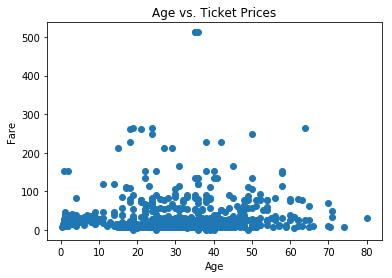

In [15]:
# copy
dfcp = df
dfcp['Age'].fillna(0)
dfcp['Fare'].fillna(0)
import matplotlib.pyplot as plt
plt.scatter(dfcp.Age, dfcp.Fare)
plt.title("Age vs. Ticket Prices (null values replaced with 0)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

5. Replace the missing values in "Age" and "Fare" columns with the mean of each column, and visualise in a scatterplot

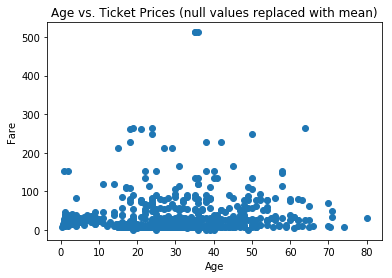

In [16]:
# Last task, let's change our source dataframe
df['Age'].fillna(df['Age'].mean())
df['Fare'].fillna(df['Fare'].mean())
import matplotlib.pyplot as plt
plt.scatter(dfcp.Age, dfcp.Fare)
plt.title("Age vs. Ticket Prices (null values replaced with mean)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

6. Reflect on the differences you see in these plots.
Plots look identical.